# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [24]:
# your code here
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

In [2]:
# your code here
df = pd.read_csv("exch_rates.csv")
df['Frequency'] = pd.to_datetime(df['Frequency'])
df.set_index('Frequency', inplace=True)

Plot the three exchange rates in one plot

Text(0.5,0,'Year')

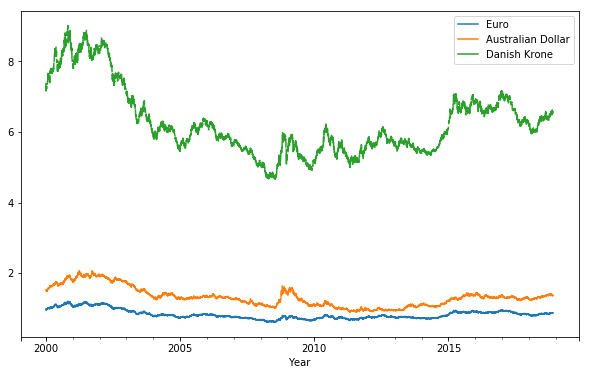

In [4]:
# your code here
df.plot(figsize=(10,6))
plt.xlabel('Year')

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [6]:
# your code here
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.
While all of the currencies are highly correlated, the Kroner and the Euro are almost an exact correlation. This is because the two currencies are tied together.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

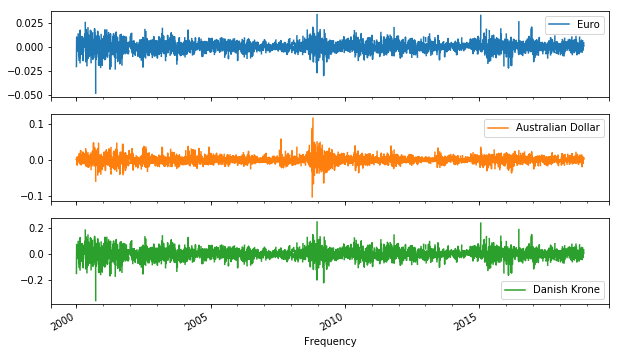

In [11]:
# your code here
dfdiff = df.diff(periods=1)
dfdiff.plot(figsize = (10,6), subplots=True);
plt.legend()

In [12]:
# your code here
dfdiff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


In [ ]:
# your code here

### Explain what's going on
Removing seasonality with differencing got rid of some of the noise of the correlation, reducing the correlation due to similar movement due to time of the year.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [13]:
# your code here
lag1df= df['Euro'].shift(periods=1)

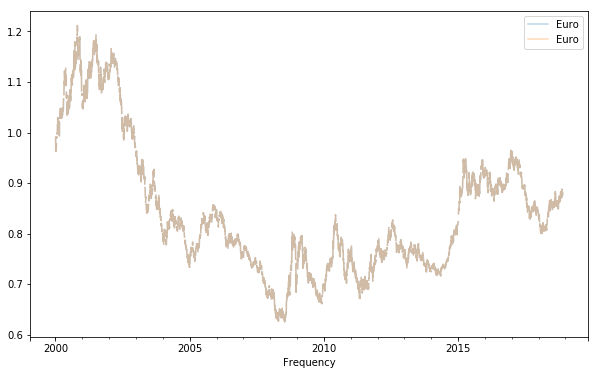

In [17]:
# your code here\
lag1= pd.concat([lag1df, df['Euro']], axis=1)
lag1.plot(figsize=(10,6), alpha=0.3);

In [18]:
# your code here
lag1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

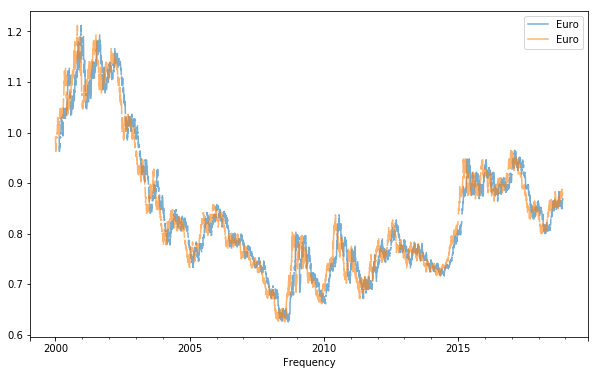

In [21]:
# your code here
dflag50 = df['Euro'].shift(periods=50)

lag50= pd.concat([dflag50, df['Euro']], axis=1)
lag50.plot(figsize=(10,6), alpha=0.6);

In [22]:
# your code here
lag50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?
Autocorrelation is high, the large shift increased correlation

Knowing this, let's plot the ACF now.

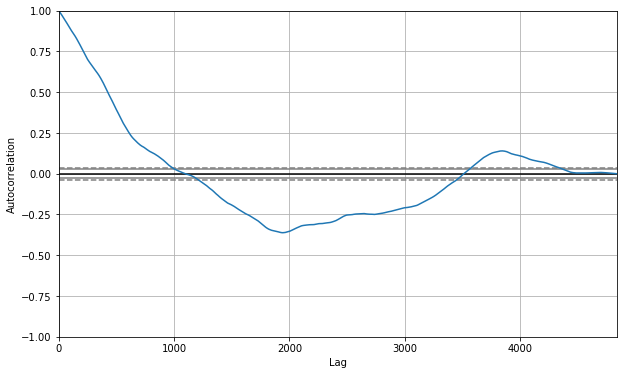

In [23]:
# your code here
plt.figure(figsize=(10,6))
pd.plotting.autocorrelation_plot(df['Euro'].dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

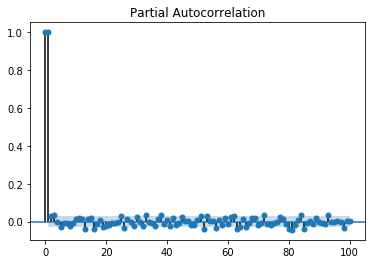

In [25]:
# your code here

plot_pacf(df['Euro'].dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [26]:
# your code here
dfpass= pd.read_csv('passengers.csv')
dfpass.Month = pd.to_datetime(dfpass.Month)
dfpass.set_index('Month', inplace = True)

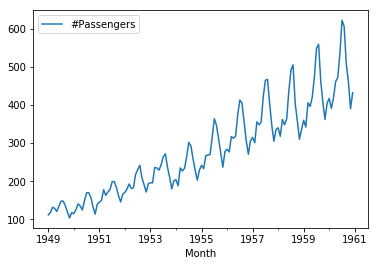

In [27]:
# your code here
dfpass.plot()


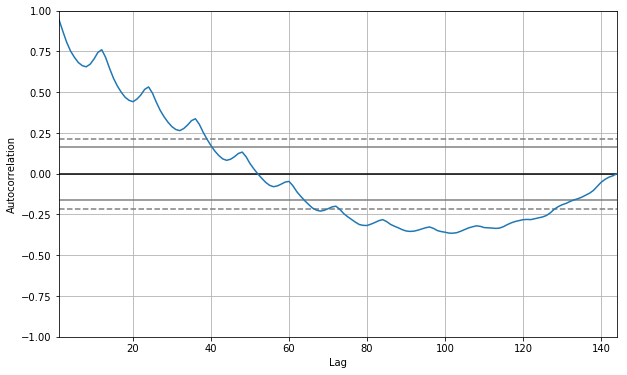

In [28]:
# your code here
plt.figure(figsize=(10,6))
pd.plotting.autocorrelation_plot(dfpass);

C:\Users\Brian\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


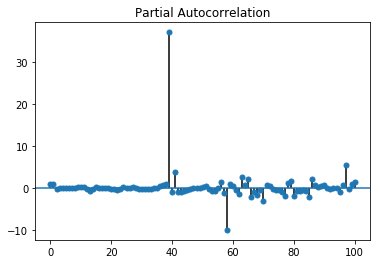

In [29]:
# your code here
plot_pacf(dfpass.dropna(), lags = 100);

In [30]:
# your code here
dfpassdiff = dfpass.diff(periods=1)

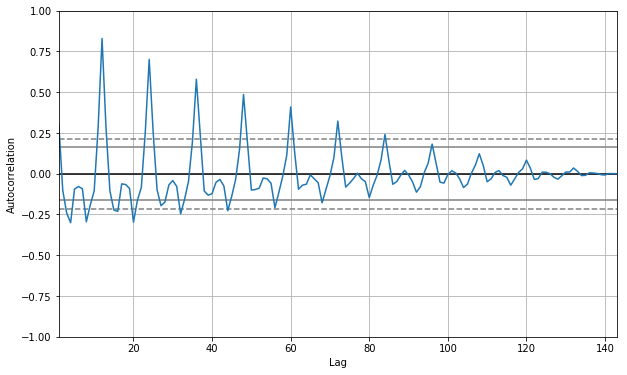

In [31]:
# your code here
plt.figure(figsize=(10,6))
pd.plotting.autocorrelation_plot(dfpassdiff.dropna());

C:\Users\Brian\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


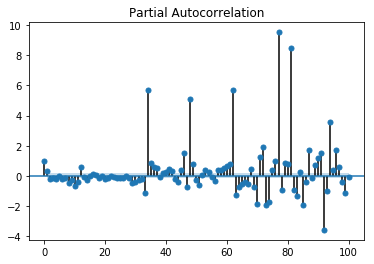

In [32]:
# your code here
plot_pacf(dfpassdiff.dropna(), lags = 100);

### Your conclusion here
The Partial Autocorrelation is high in year intervals, seasonality is more apparent when differenced.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [40]:
dfNYSE = pd.read_csv("NYSE_monthly.csv")
dfNYSE['Month'] = pd.to_datetime(dfNYSE['Month'])
dfNYSE.set_index('Month', inplace=True)
dfNYSE.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


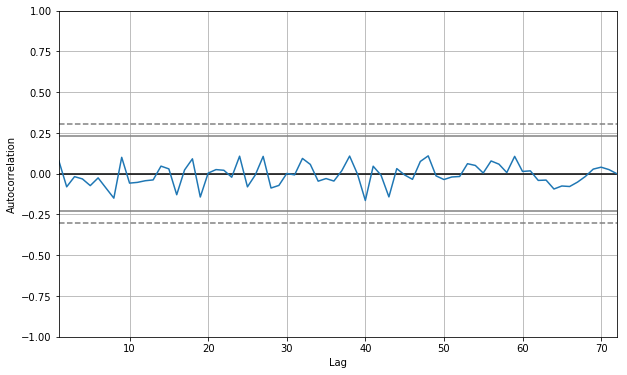

In [41]:
# your code here
plt.figure(figsize=(10,6))
pd.plotting.autocorrelation_plot(dfNYSE.dropna());

C:\Users\Brian\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Brian\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


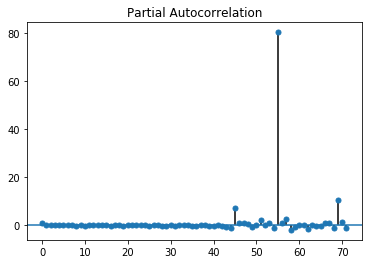

In [42]:
# your code here\
plot_pacf(dfNYSE, lags = 100);

## Your conclusion here NO trends or seasonality



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!